<a href="https://colab.research.google.com/github/mohamednihal/Perceptron-Deep-Learning/blob/main/Deeplearning_Perceptons_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

weighted sum=x 
1
​
 w 
1
​
 +x 
2
​
 w 
2
​
 +...+x 
n
​
 w 
n
​


In [ ]:
lines = []

class Perceptron:
  def __init__(self, num_inputs=3, weights=[1,1,1]):
    self.num_inputs = num_inputs
    self.weights = weights

  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += self.weights[i]*inputs[i]
    return weighted_sum

  def activation(self, weighted_sum):
    if weighted_sum >= 0:
      return 1
    if weighted_sum < 0:
      return -1

  def training(self, training_set):
    foundLine = False
    while not foundLine:
      total_error = 0
      for inputs in training_set:
        prediction = self.activation(self.weighted_sum(inputs))
        actual = training_set[inputs]
        error = actual - prediction
        total_error += abs(error)
        for i in range(self.num_inputs):
          self.weights[i] += error*inputs[i]

      slope = -self.weights[0]/self.weights[1]
      intercept = -self.weights[2]/self.weights[1]
      y1 = (slope * 0) + intercept
      y2 = (slope * 50) + intercept
      lines.append([[0,50], [y1, y2]])

      if total_error == 0:
        foundLine = True


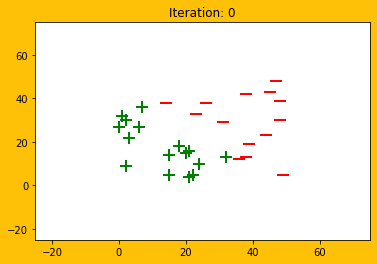

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
# from perceptron import Perceptron, lines

def generate_training_set(num_points):
	x_coordinates = [random.randint(0, 50) for i in range(num_points)]
	y_coordinates = [random.randint(0, 50) for i in range(num_points)]
	training_set = dict()
	for x, y in zip(x_coordinates, y_coordinates):
		if x <= 45-y:
			training_set[(x,y,1)] = 1
		elif x > 45-y:
			training_set[(x,y,1)] = -1
	return training_set

training_set = generate_training_set(30)

x_plus = []
y_plus = []
x_minus = []
y_minus = []

for data in training_set:
	if training_set[data] == 1:
		x_plus.append(data[0])
		y_plus.append(data[1])
	elif training_set[data] == -1:
		x_minus.append(data[0])
		y_minus.append(data[1])

perceptron = Perceptron()
perceptron.training(training_set)

fig = plt.figure()
ax = plt.axes(xlim=(-25, 75), ylim=(-25, 75))
line, = ax.plot([], [], lw=2)

fig.patch.set_facecolor('#ffc107')

plt.scatter(x_plus, y_plus, marker = '+', c = 'green', s = 128, linewidth = 2)
plt.scatter(x_minus, y_minus, marker = '_', c = 'red', s = 128, linewidth = 2)

plt.title('Iteration: 0')


def animate(i):
    print(i)
    line.set_xdata(lines[i][0])  # update the data
    line.set_ydata(lines[i][1])  # update the data
    return line,

def init():
    line.set_data([], [])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=1, init_func=init, interval=50, blit=True, repeat=False)

plt.show()